In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
db = pd.read_csv(r"C:\Users\User\Desktop\data project\Popular_Baby_Names.csv")
db.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


### Data Cleaning

In [13]:
db.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year of Birth,49509.0,2013.407421,2.145505,2011.0,2012.0,2013.0,2014.0,2019.0
Count,49509.0,33.839807,38.877785,10.0,13.0,20.0,36.0,426.0
Rank,49509.0,57.032418,25.504754,1.0,38.0,58.0,78.0,102.0


In [14]:
db.shape

(49509, 6)

In [15]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49509 entries, 0 to 49508
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year of Birth       49509 non-null  int64 
 1   Gender              49509 non-null  object
 2   Ethnicity           49509 non-null  object
 3   Child's First Name  49509 non-null  object
 4   Count               49509 non-null  int64 
 5   Rank                49509 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.3+ MB


In [16]:
db=db.drop_duplicates()

In [17]:
db['Ethnicity']= db['Ethnicity'].replace('WHITE NON HISP','WHITE NON HISPANIC')
db['Ethnicity']= db['Ethnicity'].replace('ASIAN AND PACI','ASIAN AND PACIFIC ISLANDER')
db['Ethnicity']= db['Ethnicity'].replace('BLACK NON HISP','BLACK NON HISPANIC')

In [18]:
db.shape

(18053, 6)

In [19]:
db.isnull().sum()

Year of Birth         0
Gender                0
Ethnicity             0
Child's First Name    0
Count                 0
Rank                  0
dtype: int64

In [20]:
db["Gender"].value_counts()

FEMALE    9179
MALE      8874
Name: Gender, dtype: int64

In [21]:
db["Ethnicity"].value_counts()

WHITE NON HISPANIC            6513
HISPANIC                      5180
BLACK NON HISPANIC            3207
ASIAN AND PACIFIC ISLANDER    3153
Name: Ethnicity, dtype: int64

### MaleBabies

In [22]:
male = db['Gender'].value_counts()["MALE"]
male = db[db['Gender'] != 'FEMALE']

male.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
363,2013,MALE,HISPANIC,Jared,25,80
416,2013,MALE,HISPANIC,Jariel,25,80
547,2011,MALE,ASIAN AND PACIFIC ISLANDER,AARAV,15,51
548,2011,MALE,ASIAN AND PACIFIC ISLANDER,AARON,51,19
549,2011,MALE,ASIAN AND PACIFIC ISLANDER,ABDUL,20,46


In [23]:
male_popularity = male.query("Rank >101", inplace = False).sort_values("Rank", ascending = False)
male_popularity.head(10)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
6954,2014,MALE,WHITE NON HISPANIC,Lucien,10,102
6988,2014,MALE,WHITE NON HISPANIC,Hayden,10,102
7496,2014,MALE,WHITE NON HISPANIC,Dashiell,10,102
8185,2014,MALE,WHITE NON HISPANIC,Imran,10,102
8188,2014,MALE,WHITE NON HISPANIC,Giuseppe,10,102
8285,2014,MALE,WHITE NON HISPANIC,Karas,10,102
9864,2014,MALE,WHITE NON HISPANIC,Erik,10,102
10141,2014,MALE,WHITE NON HISPANIC,Shraga,10,102
10879,2014,MALE,WHITE NON HISPANIC,Myles,10,102
11156,2014,MALE,WHITE NON HISPANIC,Yidel,10,102


In [24]:
male_popularity["Child's First Name"]

6954       Lucien
6988       Hayden
7496     Dashiell
8185        Imran
8188     Giuseppe
8285        Karas
9864         Erik
10141      Shraga
10879       Myles
11156       Yidel
11400      Berish
12239      Marcel
12827       Denis
12830       Issac
13830        Nico
13851     Mordche
Name: Child's First Name, dtype: object

In [25]:
male['Ethnicity'].value_counts()

WHITE NON HISPANIC            3110
HISPANIC                      2547
BLACK NON HISPANIC            1617
ASIAN AND PACIFIC ISLANDER    1600
Name: Ethnicity, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'HISPANIC'),
  Text(1, 0, 'ASIAN AND PACIFIC ISLANDER'),
  Text(2, 0, 'BLACK NON HISPANIC'),
  Text(3, 0, 'WHITE NON HISPANIC')])

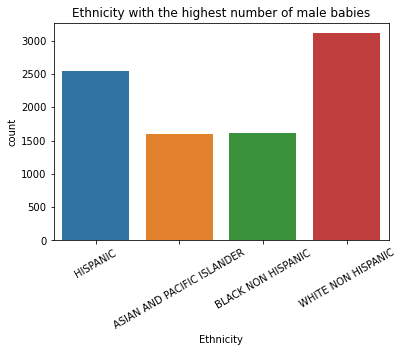

In [27]:
sns.countplot(data= male, x = 'Ethnicity')
plt.title("Ethnicity with the highest number of male babies")
plt.xticks(rotation=30)

In [ ]:
sns.catplot(data= male, kind = bar,y= 'x = 'Ethnicity')
plt.title("Ethnicity with the highest number of male babies")
plt.xticks(rotation=30)

## FemaleBabies

In [28]:
female = db['Gender'].value_counts()["FEMALE"]
female = db[db['Gender'] != 'MALE']

female.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


In [35]:
female_popularity = female.query("Rank >85", inplace = False).sort_values("Rank", ascending = False)
female_popularity.head(10)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
6278,2014,FEMALE,WHITE NON HISPANIC,Amelie,10,86
6399,2014,FEMALE,WHITE NON HISPANIC,Celine,10,86
13281,2014,FEMALE,WHITE NON HISPANIC,Erin,10,86
13171,2014,FEMALE,WHITE NON HISPANIC,Cassidy,10,86
12912,2014,FEMALE,WHITE NON HISPANIC,Amanda,10,86
12453,2014,FEMALE,WHITE NON HISPANIC,Carly,10,86
12182,2014,FEMALE,WHITE NON HISPANIC,Kennedy,10,86
12179,2014,FEMALE,WHITE NON HISPANIC,Samira,10,86
11820,2014,FEMALE,WHITE NON HISPANIC,Lilian,10,86
11671,2014,FEMALE,WHITE NON HISPANIC,Rowan,10,86


In [36]:
female_popularity["Child's First Name"]

6278       Amelie
6399       Celine
13281        Erin
13171     Cassidy
12912      Amanda
12453       Carly
12182     Kennedy
12179      Samira
11820      Lilian
11671       Rowan
11378       Leora
11303       Linda
11253      Avital
11186       Reizy
10650       Eleni
10399      Ruchel
10182       Hinda
9812         Rosa
9555        Ayala
9549         Jana
9119        Brynn
8838        Salma
8835       Athena
8734        Celia
8025     Adrianna
7834       Camila
7554         Anne
7548      Delilah
7388      Kaitlyn
7368      Barbara
6819       Sylvie
13788       Ester
Name: Child's First Name, dtype: object

In [37]:
female['Ethnicity'].value_counts()

WHITE NON HISPANIC            3403
HISPANIC                      2633
BLACK NON HISPANIC            1590
ASIAN AND PACIFIC ISLANDER    1553
Name: Ethnicity, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'HISPANIC'),
  Text(1, 0, 'WHITE NON HISPANIC'),
  Text(2, 0, 'ASIAN AND PACIFIC ISLANDER'),
  Text(3, 0, 'BLACK NON HISPANIC')])

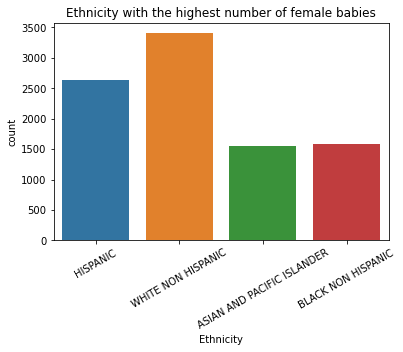

In [38]:
sns.countplot(data= female, x = 'Ethnicity')
plt.title("Ethnicity with the highest number of female babies")
plt.xticks(rotation=30)

From the analysis above, white non hispanic has the highest number of babies both male and female